In [2]:
import pyart
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import xarray as xr
import cartopy.feature as cfeature

import products
import sort_radar
import cartopy.crs as ccrs
from datetime import datetime, timedelta
from time import process_time
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.io.shapereader as shpreader


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [3]:
#ideia ler uma hora de arquivos centrado no horrario do evento, fazer o corte de 30 a 35km depois plotar num graf de tempo pra observar a evolução#
#zoom na região, colocar o shape dos municipios na farm, tentar reetirar ruido usando perfis verticais, limites da velocidade 45 , -45, concertar os graficos de linha pra ser a media do 3X3 do ponto#

In [4]:
reader = shpreader.Reader('SC_municipios_2021.shp')
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

In [6]:
#por algum motivo os 2 numeros finais (eu acho que são os segundos) as vezes mudam n esqueça de verificar eles!!!!#
#20210325 - 1847 05 -27.1560 -52.3169# ok
#20210727 - 0750 04 -27.0866 -51.9956# ok
#20211230 - 1501 04 -27.1955 -52.1121# ok
#20210921 - 0950 04 -26.8099 -52.4436# ok
#20210727 - 0730 04 -27.1574 -52.3154# ok
#20221112 - 2016 05 -26.8496 -52.9885# ok
#20210917 - 0927  -27.0704 -52.6134  # ok
#20220622 - 0041 04 -27.1919 -52.6472#
#20210608 - 2137 n tem dado!!#
#20221013 - 1920 n tem dado!!#
#20221021 - 1602 n tem dado!!#
#20220430 - pedir pro thiago#
#20221021 - pedir pro thiago#

#20210209 - 17 57 04  -26,8295 -52.9750#
#20210602 - 16 30 04  -27.2269 -52.0245#
#20210917 - 09 42 05  -27.0957 -52.4808#
#20220623 - 15 02 05  -27.1016 -52.6242#
#20220807 - 19 16 04  -27.1650 -52.3449#
#20220817 - 20 26 04  -26.8176 -53.0171#
#20210917 - 09 45 05  -27.0957 -52.4808#
#20220622 - 00 41 04  -27.1919 -52.6472#
#20211006 - 18 37 05  -26.8539 -53.0431#
#20231117 - 01 48 03  -27.0972 -52.6791#

dia = '20231117'
hora ='01'
min = '48'
sec = '03'
radar = pyart.aux_io.read_gamic(f'dados2/chapeco/217BRS-{dia}{hora}{min}{sec}.HDF5')

site_lon = -52.6791 # longitude in degrees
site_lat = -27.0972 # latitdue in degrees
radar_lat = radar.latitude["data"][0]
radar_lon = radar.longitude["data"][0]

In [12]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)

display.plot_ppi_map(
    "specific_differential_phase",
    1,
    ax=ax,
    vmin=0,
    vmax=6,
    cmap =pyart.graph.cm.RefDiff,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
ax.plot([site_lon, radar_lon ], [site_lat,radar_lat], color="k", linestyle=":")
ax.scatter(radar_lon, radar_lat, color="black", label="Radar")
ax.scatter(site_lon, site_lat, color="black",s = 2, label="Caso")
plt.legend(loc="upper right")

ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomKDP.png', bbox_inches='tight',dpi = 500)
plt.close()

fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
display.plot_ppi_map(
    "corrected_reflectivity",
    1,
    ax=ax,
    vmin=0,
    vmax=70,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
    mask_outside=True,
)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
ax.plot([site_lon, radar_lon ], [site_lat,radar_lat], color="k", linestyle=":")
ax.scatter(radar_lon, radar_lat, color="black", label="Radar")
ax.scatter(site_lon, site_lat, color="black",s  = 2, label="Caso")
plt.legend(loc="upper right")
ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomrefletividade.png', bbox_inches='tight',dpi = 500)
plt.close()

fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
display.plot_ppi_map(
    'corrected_differential_reflectivity',
    2,
    vmin=-1,
    vmax=3,
    ax = ax,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
    cmap =pyart.graph.cm.RefDiff
)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
ax.plot([site_lon, radar_lon ], [site_lat,radar_lat], color="k", linestyle=":")
ax.scatter(radar_lon, radar_lat, color="black", label="Radar")
ax.scatter(site_lon, site_lat, color="black",s  = 2, label="Caso")
plt.legend(loc="upper right")
ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomrefleltividadediferencial.png', bbox_inches='tight',dpi = 500)
plt.close()

fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
display.plot_ppi_map(
    'cross_correlation_ratio',
    1,
    vmin=0.8,
    vmax=1,
    ax = ax,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
    cmap ="pyart_LangRainbow12"
)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
ax.plot([site_lon, radar_lon ], [site_lat,radar_lat], color="k", linestyle=":")
ax.scatter(radar_lon, radar_lat, color="black", label="Radar")
ax.scatter(site_lon, site_lat, color="black",s  = 2, label="Caso")
plt.legend(loc="upper right")
ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomrhohv.png', bbox_inches='tight', dpi = 500)
plt.close()

fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
display.plot_ppi_map(
    'corrected_velocity',
    1,
    vmin=-45,
    vmax=45,
    ax = ax,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
    cmap = 'pyart_NWSVel'
)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
ax.plot([site_lon, radar_lon ], [site_lat,radar_lat], color="k", linestyle=":")
ax.scatter(radar_lon, radar_lat, color="black", label="Radar")
ax.scatter(site_lon, site_lat, color="black",s  = 2, label="Caso")
plt.legend(loc="upper right")
ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomvelocidade.png', bbox_inches='tight',dpi = 500)
plt.close()

In [27]:
#zoom locais#
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)

display.plot_ppi_map(
    "specific_differential_phase",
    1,
    ax=ax,
    vmin=0,
    vmax=6,
    cmap =pyart.graph.cm.RefDiff,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
ax.plot([site_lon, radar_lon ], [site_lat,radar_lat], color="k", linestyle=":")
ax.scatter(radar_lon, radar_lat, color="black", label="Radar")
ax.scatter(site_lon, site_lat, color="black",s = 2, label="Caso")
plt.legend(loc="upper right")

ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomKDP.png', bbox_inches='tight',dpi = 500)
plt.close()

fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
display.plot_ppi_map(
    "corrected_reflectivity",
    1,
    ax=ax,
    vmin=0,
    vmax=70,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
    mask_outside=True,
)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
ax.plot([site_lon, radar_lon ], [site_lat,radar_lat], color="k", linestyle=":")
ax.scatter(radar_lon, radar_lat, color="black", label="Radar")
ax.scatter(site_lon, site_lat, color="black",s  = 2, label="Caso")
plt.legend(loc="upper right")
ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomrefletividade.png', bbox_inches='tight',dpi = 500)
plt.close()

fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
display.plot_ppi_map(
    'corrected_differential_reflectivity',
    2,
    vmin=-1,
    vmax=3,
    ax = ax,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
    cmap =pyart.graph.cm.RefDiff
)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
ax.plot([site_lon, radar_lon ], [site_lat,radar_lat], color="k", linestyle=":")
ax.scatter(radar_lon, radar_lat, color="black", label="Radar")
ax.scatter(site_lon, site_lat, color="black",s  = 2, label="Caso")
plt.legend(loc="upper right")
ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomrefleltividadediferencial.png', bbox_inches='tight',dpi = 500)
plt.close()

fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
display.plot_ppi_map(
    'cross_correlation_ratio',
    1,
    vmin=0.8,
    vmax=1,
    ax = ax,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
    cmap ="pyart_LangRainbow12"
)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
ax.plot([site_lon, radar_lon ], [site_lat,radar_lat], color="k", linestyle=":")
ax.scatter(radar_lon, radar_lat, color="black", label="Radar")
ax.scatter(site_lon, site_lat, color="black",s  = 2, label="Caso")
plt.legend(loc="upper right")
ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomrhohv.png', bbox_inches='tight', dpi = 500)
plt.close()

fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
display.plot_ppi_map(
    'corrected_velocity',
    1,
    vmin=-45,
    vmax=45,
    ax = ax,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
    cmap = 'pyart_NWSVel'
)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
ax.plot([site_lon, radar_lon ], [site_lat,radar_lat], color="k", linestyle=":")
ax.scatter(radar_lon, radar_lat, color="black", label="Radar")
ax.scatter(site_lon, site_lat, color="black",s  = 2, label="Caso")
plt.legend(loc="upper right")
ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zoomvelocidade.png', bbox_inches='tight',dpi = 500)
plt.close()


In [31]:
#farm de plot automatico(funciona!, mas sem zoom)#

g = 0
d = 0 
c = int(hora)- 1 
min = int(min)
while g< 24:
    if min >=60:
        c = c+1
        min= min-60
    if 10>c and min >10:
        radar = pyart.aux_io.read_gamic(f'dados2/chapeco/217BRS-{dia}0{c}{min}{sec}.HDF5')
        min  = min +6
    if 10> c and min <10:
        radar =  pyart.aux_io.read_gamic(f'dados2/chapeco/217BRS-{dia}0{c}0{min}{sec}.HDF5')
        min= min+6
    if c>=10 and min<10:
        radar =  pyart.aux_io.read_gamic(f'dados2/chapeco/217BRS-{dia}{c}0{min}{sec}.HDF5')
        min= min+6
    if c>=10 and min> 10 :
        radar =  pyart.aux_io.read_gamic(f'dados2/chapeco/217BRS-{dia}{c}{min}{sec}.HDF5')
        min = min +6
    d = d+1
    # Setup the RadarMapDisplay and add our projection
    display = pyart.graph.RadarMapDisplay(radar)
    fig = plt.figure()
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
    display.plot_ppi_map(
        "corrected_reflectivity",
        1,
        ax=ax,
        vmin=0,
        vmax=70,
        lon_lines=np.arange(-98, -97, 0.2),
        lat_lines=np.arange(36, 37, 0.2),
    )

    # Plot our site location on top of the radar image
    ax.scatter(site_lon, site_lat, color="black",s  = 2)
    ax.add_feature(cfeature.STATES.with_scale('10m'))
    fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\refletividade{d}.png', bbox_inches='tight',dpi = 500)
    plt.close()

    fig = plt.figure()
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
    display.plot_ppi_map(
        'corrected_velocity',
        1,
        vmin=-45,
        vmax=45,
        ax = ax,
        lon_lines=np.arange(-98, -97, 0.2),
        lat_lines=np.arange(36, 37, 0.2),
        cmap = 'pyart_NWSVel'
    )
    ax.scatter(site_lon, site_lat, color="black",s  = 2)
    ax.add_feature(cfeature.STATES.with_scale('10m'))
    fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\velocidade{d}.png', bbox_inches='tight',dpi = 500)
    plt.close()
  
    fig = plt.figure()
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
    display.plot_ppi_map(
        'corrected_differential_reflectivity',
        2,
        vmin=-1,
        vmax=3,
        ax = ax,
        lon_lines=np.arange(-98, -97, 0.2),
        lat_lines=np.arange(36, 37, 0.2),
        cmap =pyart.graph.cm.RefDiff
    )
    ax.scatter(site_lon, site_lat, color="black",s  = 2)
    ax.add_feature(cfeature.STATES.with_scale('10m'))
    fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\refleltividadediferencial{d}.png', bbox_inches='tight',dpi = 500)
    plt.close()

    fig = plt.figure()
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
    display.plot_ppi_map(
        'specific_differential_phase',
        1,
        vmin=0,
        vmax=6,
        ax = ax,
        lon_lines=np.arange(-98, -97, 0.2),
        lat_lines=np.arange(36, 37, 0.2),
        cmap =pyart.graph.cm.RefDiff
    )
    ax.scatter(site_lon, site_lat, color="black",s  = 2)
    ax.add_feature(cfeature.STATES.with_scale('10m'))
    fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\kdp{d}.png', bbox_inches='tight', dpi = 500)
    plt.close()

    fig = plt.figure()
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)
    
    display.plot_ppi_map(
        'cross_correlation_ratio',
        1,
        vmin=0.8,
        vmax=1,
        ax = ax,
        lon_lines=np.arange(-98, -97, 0.2),
        lat_lines=np.arange(36, 37, 0.2),
        cmap ="pyart_LangRainbow12"
    )
    ax.scatter(site_lon, site_lat, color="black",s  = 2)
    ax.add_feature(cfeature.STATES.with_scale('10m'))
    fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\rhohv{d}.png', bbox_inches='tight', dpi = 500)
    plt.close()
        
    g =g +1

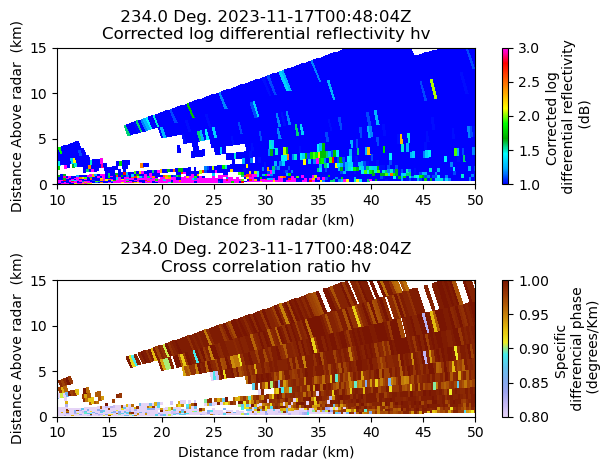

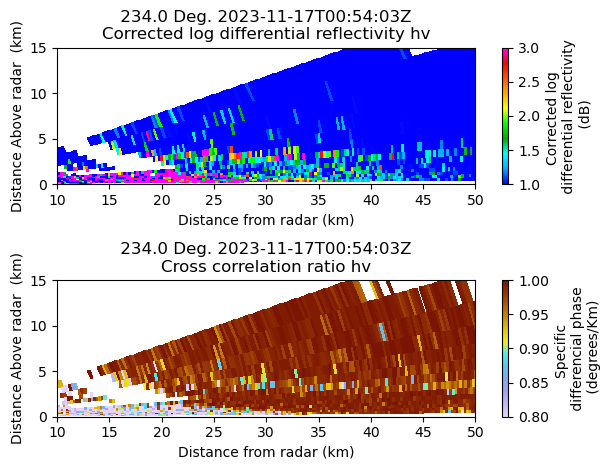

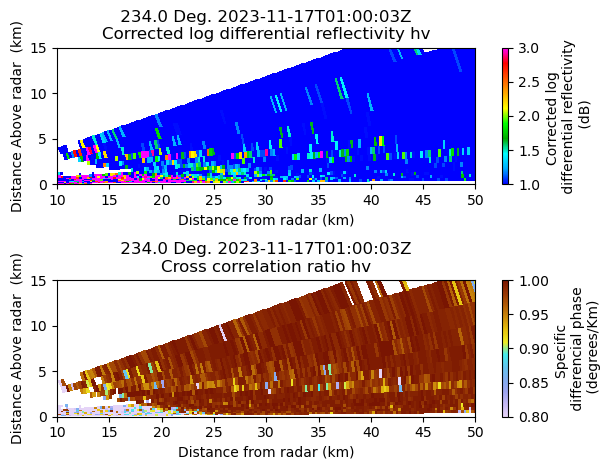

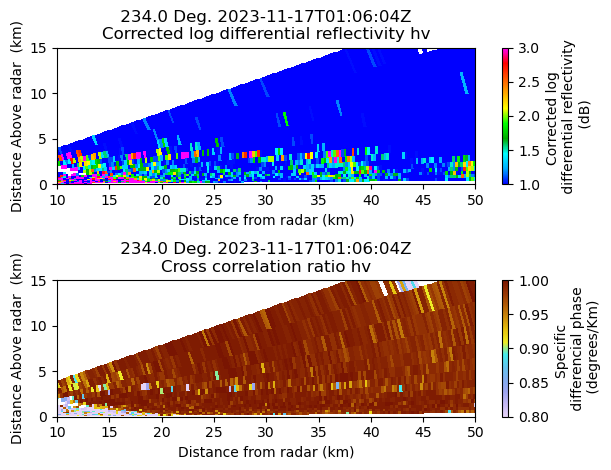

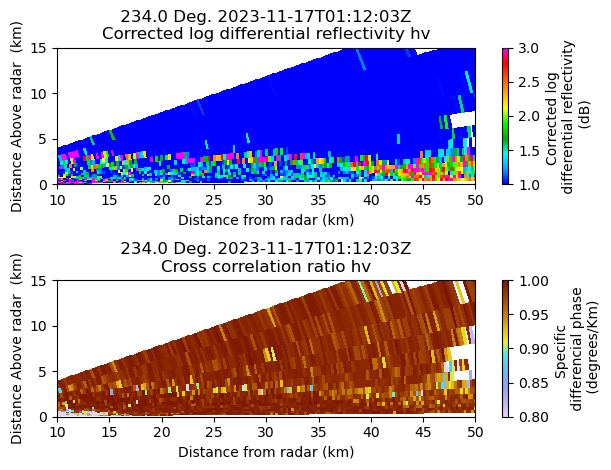

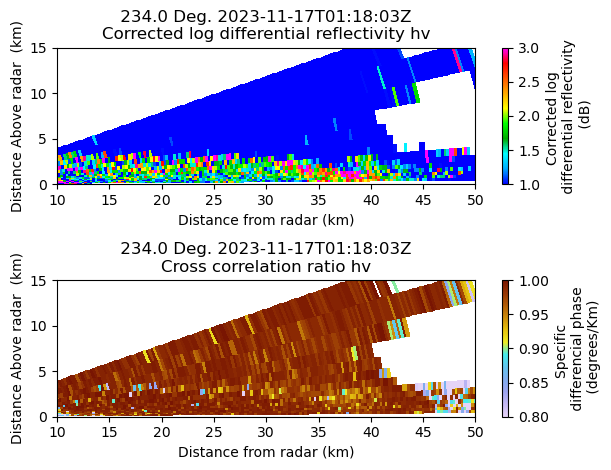

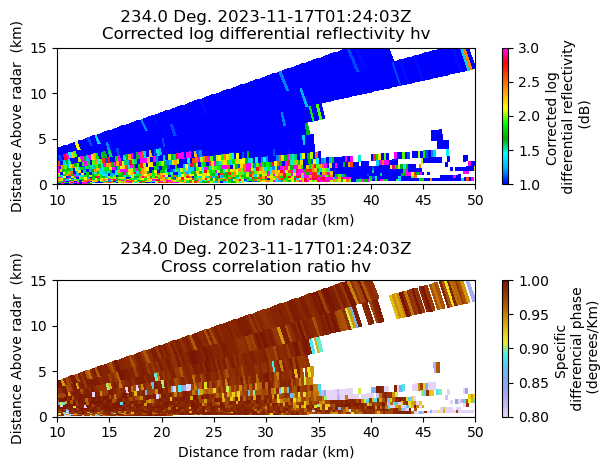

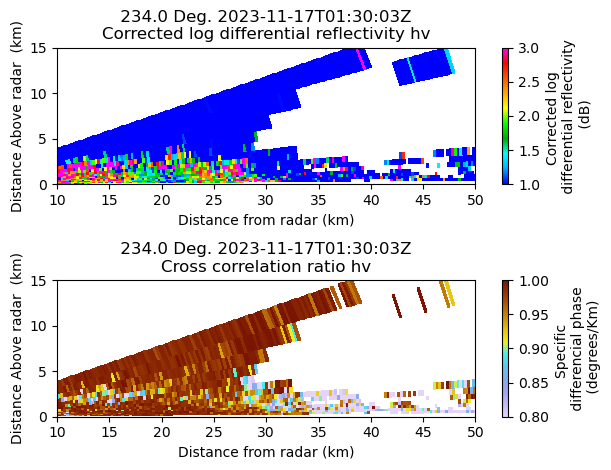

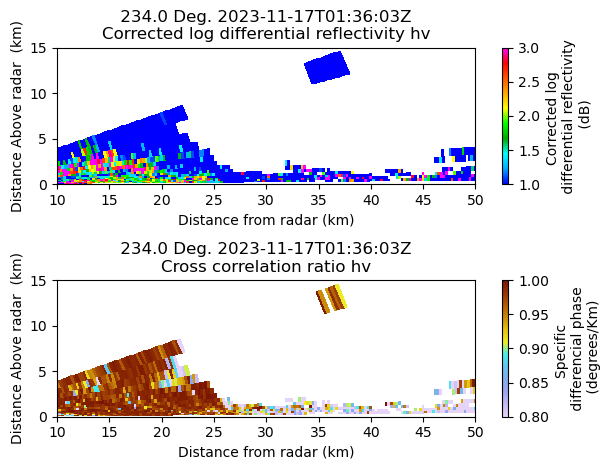

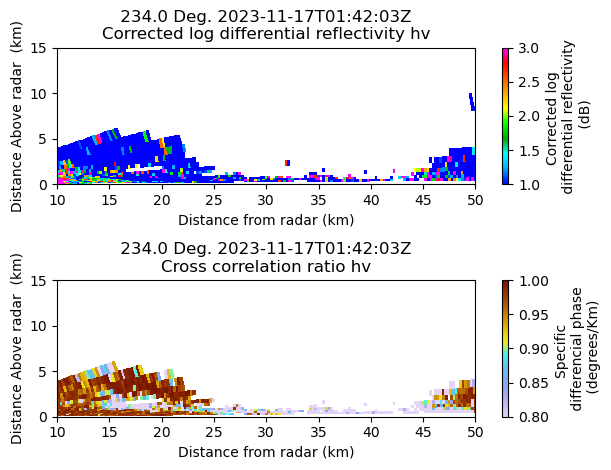

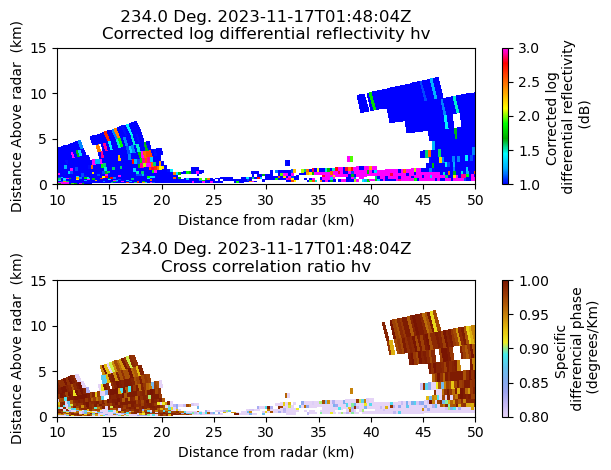

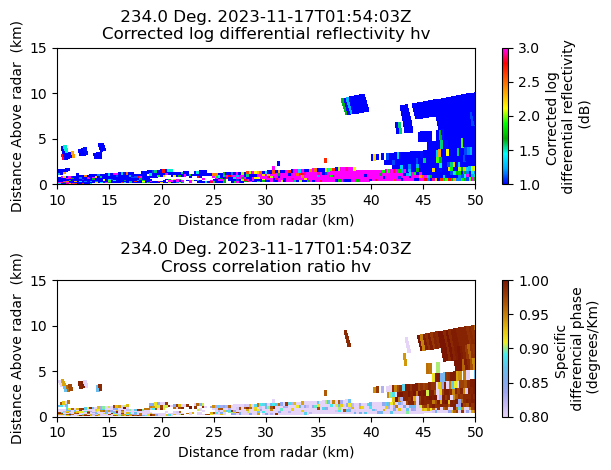

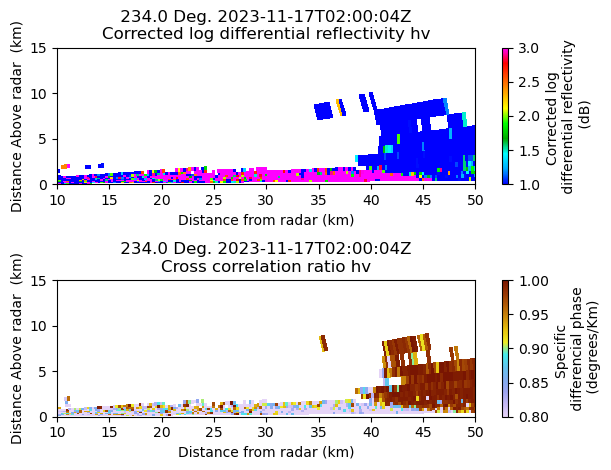

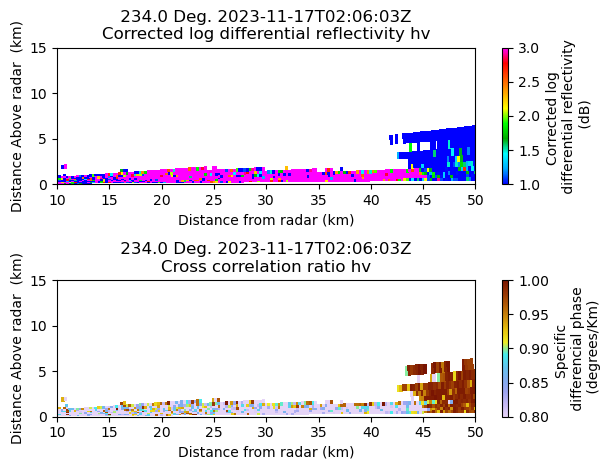

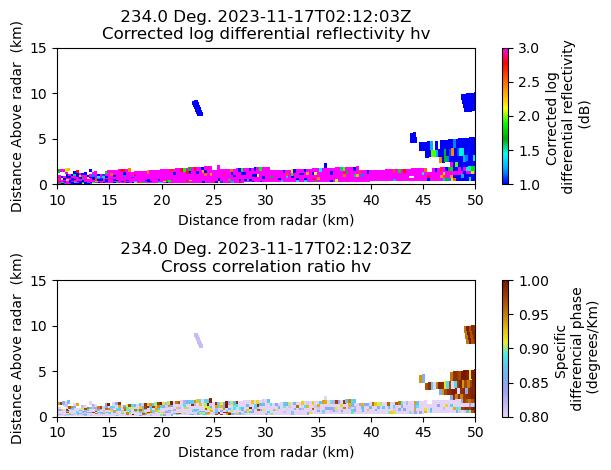

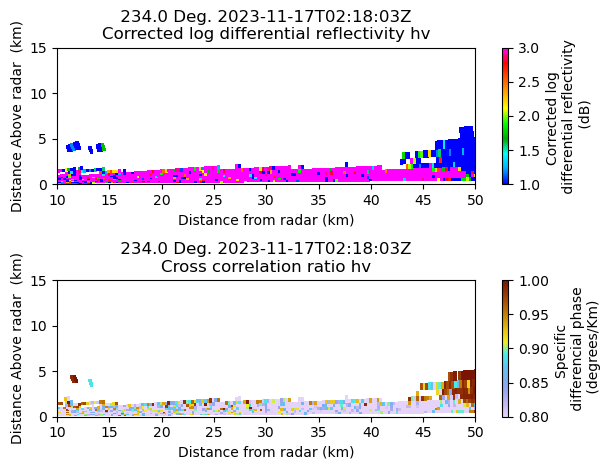

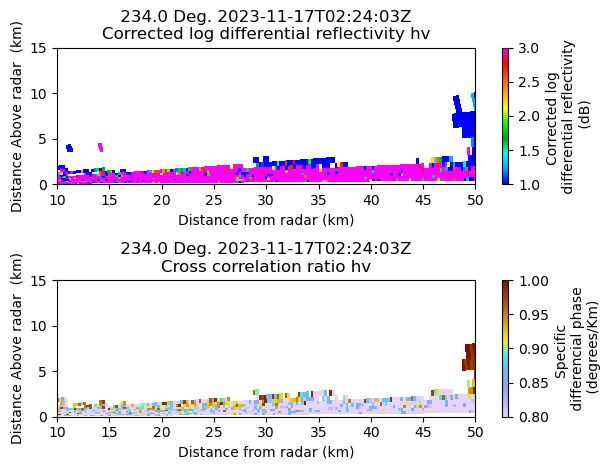

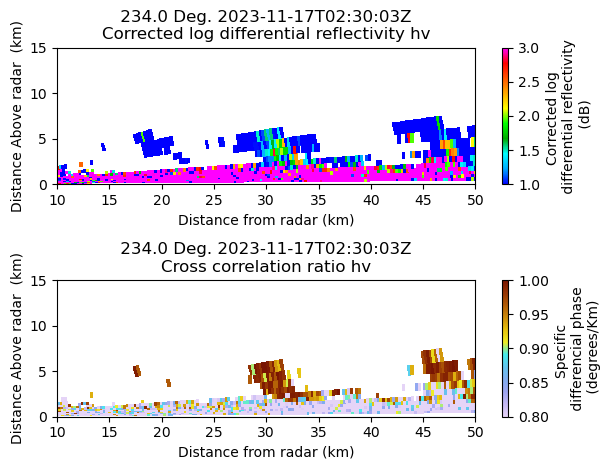

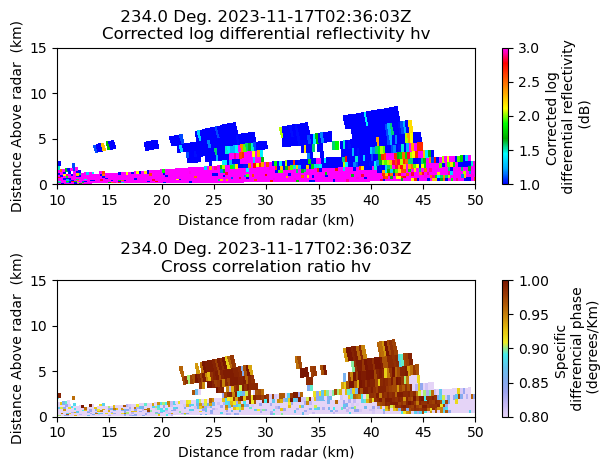

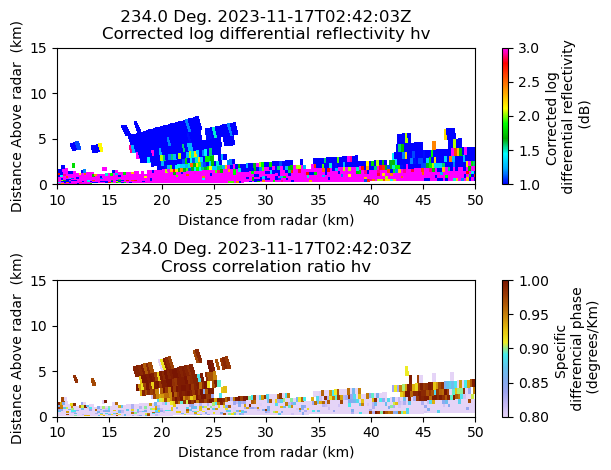

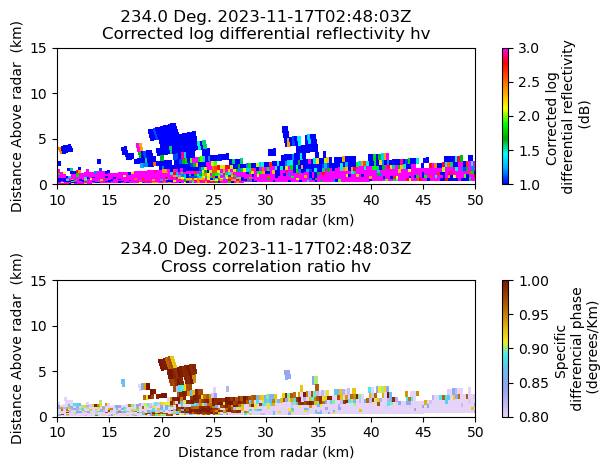

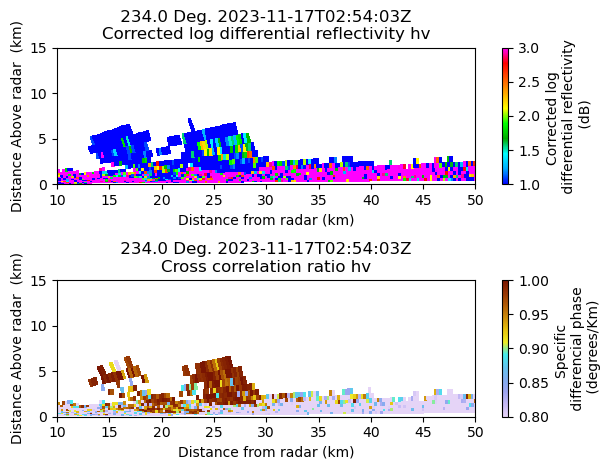

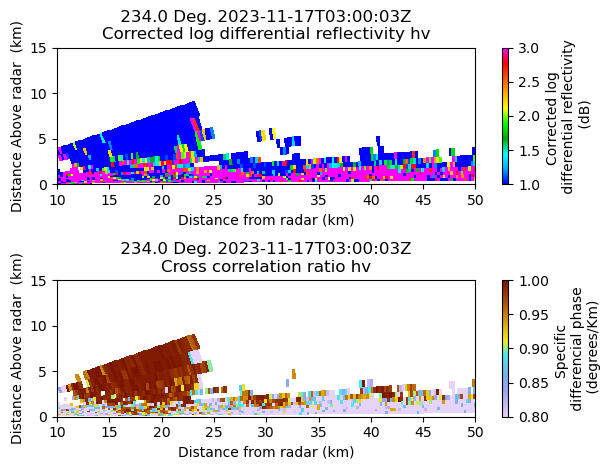

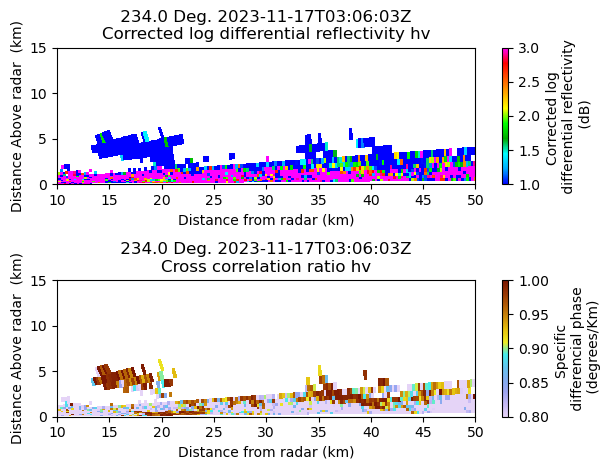

In [37]:
#cortes TRANSversais loop#
g = 0
d = 0 
c = int(hora) - 1 
min = int(min)

while g< 24:
    if min >=60:
        c = c+1
        min= min-60
    if 10>c and min >10:
        radar = pyart.aux_io.read_gamic(f'dados2/chapeco/217BRS-{dia}0{c}{min}{sec}.HDF5')
        min  = min +6
    if 10> c and min <10:
        radar =  pyart.aux_io.read_gamic(f'dados2/chapeco/217BRS-{dia}0{c}0{min}{sec}.HDF5')
        min= min+6
    if c>=10 and min<10:
        radar =  pyart.aux_io.read_gamic(f'dados2/chapeco/217BRS-{dia}{c}0{min}{sec}.HDF5')
        min= min+6
    if c>=10 and min> 10 :
        radar =  pyart.aux_io.read_gamic(f'dados2/chapeco/217BRS-{dia}{c}{min}{sec}.HDF5')
        min = min +6
    d = d+1
    xsect = pyart.util.cross_section_ppi(radar, [234,235])
    colorbar_label = "Specific \n differencial phase \n (degrees/Km)"
    colorbar_label2 = "Corrected log \n differential reflectivity \n (dB)"
    display = pyart.graph.RadarDisplay(xsect)
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    display.plot(
        'corrected_differential_reflectivity', 0, vmin=1, vmax=3, colorbar_label=colorbar_label2, cmap =pyart.graph.cm.RefDiff
    )
    plt.ylim(0, 15)
    plt.xlim(10,50)
    ax2 = fig.add_subplot(212)
    display.plot(
        "cross_correlation_ratio", 0, vmin=0.8, vmax=1, colorbar_label=colorbar_label,cmap ="pyart_LangRainbow12"
    )
    plt.ylim(0, 15)
    plt.xlim(10,50)

    plt.tight_layout()
    plt.show()
    fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\comparacao{d}.png', bbox_inches='tight',dpi = 500)
    plt.close()
    g =g +1

In [1]:
#gerador de media dos pontos proximos ao local do evento#
ds = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon)
ds2 = pyart.util.columnsect.get_field_location(radar, site_lat+0.005, site_lon+0.005)
ds3 = pyart.util.columnsect.get_field_location(radar, site_lat+0.005, site_lon-0.005)
ds4 = pyart.util.columnsect.get_field_location(radar, site_lat-0.005, site_lon+0.005)
ds5 = pyart.util.columnsect.get_field_location(radar, site_lat-0.005, site_lon-0.005)
ds6 = pyart.util.columnsect.get_field_location(radar, site_lat+0.005, site_lon)
ds7 = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon+0.005)
ds8 = pyart.util.columnsect.get_field_location(radar, site_lat-0.005, site_lon)
ds9 = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon-0.005)

refle = (ds.corrected_reflectivity[:].values+ ds2.corrected_reflectivity[:].values+ds3.corrected_reflectivity[:].values+ds4.corrected_reflectivity[:].values+ds5.corrected_reflectivity[:].values+ds6.corrected_reflectivity[:].values+ds7.corrected_reflectivity[:].values+ds8.corrected_reflectivity[:].values+ds9.corrected_reflectivity[:].values)/9
rhohv = (ds.cross_correlation_ratio[:].values+ ds2.cross_correlation_ratio[:].values+ds3.cross_correlation_ratio[:].values+ds4.cross_correlation_ratio[:].values+ds5.cross_correlation_ratio[:].values+ds6.cross_correlation_ratio[:].values+ds7.cross_correlation_ratio[:].values+ds8.cross_correlation_ratio[:].values+ds9.cross_correlation_ratio[:].values)/9
velo = (ds.corrected_velocity[:].values+ ds2.corrected_velocity[:].values+ds3.corrected_velocity[:].values+ds4.corrected_velocity[:].values+ds5.corrected_velocity[:].values+ds6.corrected_velocity[:].values+ds7.corrected_velocity[:].values+ds8.corrected_velocity[:].values+ds9.corrected_velocity[:].values)/9
kdp = (ds.corrected_differential_phase[:].values+ ds2.corrected_differential_phase[:].values+ds3.corrected_differential_phase[:].values+ds4.corrected_differential_phase[:].values+ds5.corrected_differential_phase[:].values+ds6.corrected_differential_phase[:].values+ds7.corrected_differential_phase[:].values+ds8.corrected_differential_phase[:].values+ds9.corrected_differential_phase[:].values)/9
zdr = (ds.corrected_differential_reflectivity[:].values+ ds2.corrected_differential_reflectivity[:].values+ds3.corrected_differential_reflectivity[:].values+ds4.corrected_differential_reflectivity[:].values+ds5.corrected_differential_reflectivity[:].values+ds6.corrected_differential_reflectivity[:].values+ds7.corrected_differential_reflectivity[:].values+ds8.corrected_differential_reflectivity[:].values+ds9.corrected_differential_reflectivity[:].values)/9

dsm = xr.Dataset(
    data_vars=dict(
        corrected_reflectivity=(["Altura"],refle),
        cross_correlation_ratio=(["Altura"], rhohv),
        corrected_velocity=(["Altura"],velo),
        corrected_differential_phase=(["Altura"],kdp),
        corrected_differential_reflectivity=(["Altura"],zdr)
    ),
    coords=dict(
        Altura = ds.height[:].values
    )
)

NameError: name 'pyart' is not defined

In [36]:
ds

<xarray.Dataset>
Dimensions:                              (height: 14)
Coordinates:
  * height                               (height) float64 905.0 ... 3.998e+03
Data variables:
    corrected_reflectivity               (height) float32 51.67 53.17 ... 0.3745
    reflectivity                         (height) float32 51.67 54.16 ... 1.371
    corrected_velocity                   (height) float32 -3.56 -3.56 ... -13.72
    spectrum_width                       (height) float32 0.912 ... 0.8161
    corrected_differential_reflectivity  (height) float64 0.8627 2.98 ... 1.098
    corrected_differential_phase         (height) float64 3.263 6.477 ... 357.8
    differential_phase                   (height) float32 293.0 297.6 ... 284.7
    specific_differential_phase          (height) float64 0.957 ... -0.2696
    cross_correlation_ratio              (height) float32 0.902 ... 0.9961
    base_time                            datetime64[ns] 2023-11-17T01:48:04
    time_offset                          (height) datetime64[ns] 2023-11-17T0...
Attributes:
    distance_from_radar:    9.201 km
    azimuth:                234.175 degrees
    latitude_of_location:   -27.0972 degrees
    longitude_of_location:  -52.6791 degrees

In [38]:
#gerador de graficos de linha#
fig = plt.figure()
dsm.corrected_velocity.plot(y="Altura")
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\velocidade.png', bbox_inches='tight',dpi = 500)
plt.close()
fig = plt.figure()
dsm.corrected_reflectivity.plot(y="Altura")
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\refletividade.png', bbox_inches='tight',dpi = 500)
plt.close()
fig = plt.figure()
dsm.cross_correlation_ratio.plot(y="Altura")
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\rhohv.png', bbox_inches='tight',dpi = 500)
plt.close()
fig = plt.figure()
dsm.corrected_differential_phase.plot(y="Altura")
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\kdp.png', bbox_inches='tight',dpi = 500)
plt.close()
fig = plt.figure()
dsm.corrected_differential_reflectivity.plot(y="Altura")
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\zdr.png', bbox_inches='tight',dpi = 500)
plt.close()

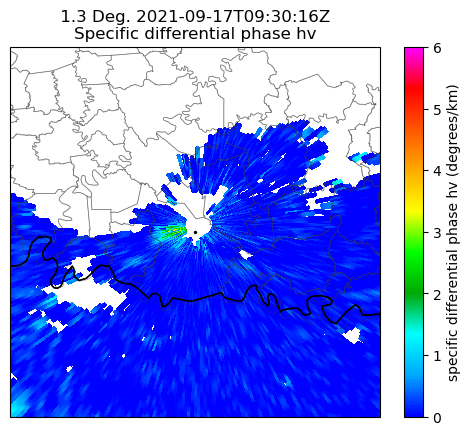

In [25]:
#zona de testes#

# Setup the RadarMapDisplay and add our projection
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.add_feature(COUNTIES, facecolor='none', edgecolor='#3b3c3d', alpha=0.5,linewidth=0.5)

# Visualize the reflectivity field, using the lowest sweep with
# latitude and longitude lines
display.plot_ppi_map(
    "specific_differential_phase",
    1,
    ax=ax,
    vmin=0,
    vmax=6,
    cmap =pyart.graph.cm.RefDiff,
    lon_lines=np.arange(-98, -97, 0.2),
    lat_lines=np.arange(36, 37, 0.2),
)
ax.set_extent([site_lon - 0.5, site_lon + 00.5, site_lat - 0.5, site_lat + 0.5])
# Plot our site location on top of the radar image
ax.scatter(site_lon, site_lat, color="black",s  = 2)
ax.add_feature(cfeature.STATES.with_scale('10m'))
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\teste.png', bbox_inches='tight',dpi = 500)

In [5]:
#tentar mapa de tempo#
ds = pyart.util.columnsect.get_field_location(radar, site_lat, site_lon)
ds2 = pyart.util.columnsect.get_field_location(radar2, site_lat, site_lon)
z = ds.corrected_reflectivity[:]
z2 = ds2.corrected_reflectivity[:]
altura = ds.height

z = xr.concat([z,z2],dim="tempo")
z[1][:]
z.tempo[:]
z
#plt.imshow(z)
#posn = ax.get_position()
#cbar_ax = fig.add_axes([posn.x0 + posn.width + 0.01, posn.y0, 0.02, posn.height])
#plt.colorbar(z,cax=cbar_ax, label='dbz')

<xarray.DataArray 'corrected_reflectivity' (tempo: 2, height: 11)>
array([[55.656864, 61.135296, 60.637257, 58.14706 , 57.64902 , 52.66863 ,
        46.692158, 37.72745 , 42.209805, 39.22157 , 23.782352],
       [52.66863 , 57.64902 , 58.6451  , 57.15098 , 56.652943, 51.67255 ,
        45.19804 , 42.209805, 35.735294, 28.762745, 19.798038]],
      dtype=float32)
Coordinates:
  * height   (height) float64 1.231e+03 1.634e+03 ... 1.038e+04 1.286e+04
Dimensions without coordinates: tempo
Attributes:
    units:          dBZ
    standard_name:  corrected_equivalent_reflectivity_factor
    long_name:      Corrected reflectivity
    coordinates:    elevation azimuth range

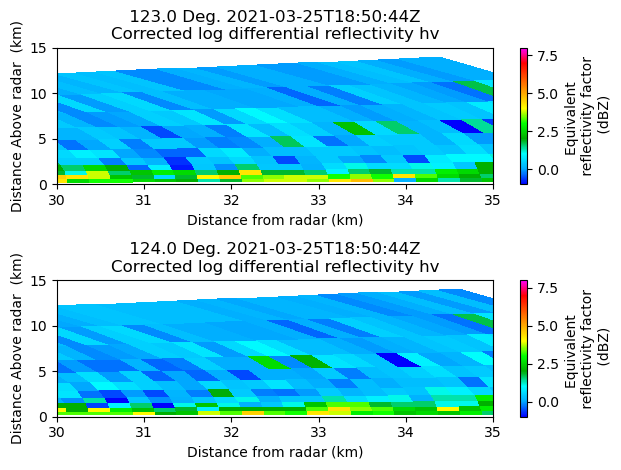

In [22]:
#Corte transversal(usar azimuth que esta no ds do codigo novo)#
xsect = pyart.util.cross_section_ppi(radar, [123,124])

# Set the colorbar label
colorbar_label = "Equivalent \n reflectivity factor \n (dBZ)"

display = pyart.graph.RadarDisplay(xsect)
fig = plt.figure()
ax1 = fig.add_subplot(211)
display.plot(
    "corrected_differential_reflectivity", 0, vmin=-1, vmax=8, colorbar_label=colorbar_label
)
plt.ylim(0, 15)
plt.xlim(30, 35)
ax2 = fig.add_subplot(212)
display.plot(
    "corrected_differential_reflectivity", 1, vmin=-1, vmax=8, colorbar_label=colorbar_label
)
plt.ylim(0, 15)
plt.xlim(30, 35)

plt.tight_layout()
plt.show()

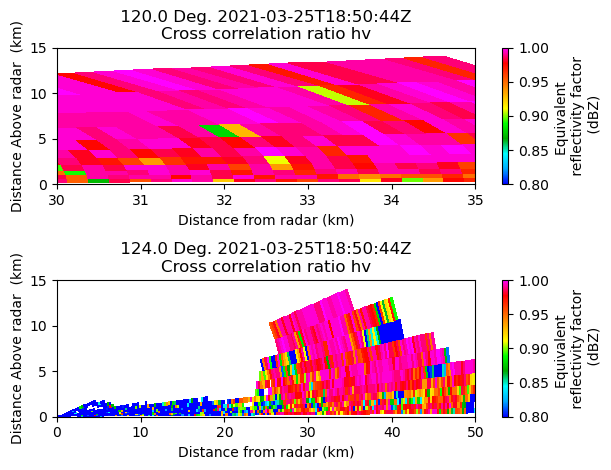

In [17]:
xsect = pyart.util.cross_section_ppi(radar, [120,124])

# Set the colorbar label
colorbar_label = "Equivalent \n reflectivity factor \n (dBZ)"

display = pyart.graph.RadarDisplay(xsect)
fig = plt.figure()
ax1 = fig.add_subplot(211)
display.plot(
    "cross_correlation_ratio", 0, vmin=0.80, vmax=1.0, colorbar_label=colorbar_label, cmap ="pyart_LangRainbow12"
)
plt.ylim(0, 15)
plt.xlim(30, 35)
ax2 = fig.add_subplot(212)
display.plot(
    "cross_correlation_ratio", 1, vmin=0.8, vmax=1, colorbar_label=colorbar_label,cmap ="pyart_LangRainbow12"
)
plt.ylim(0, 15)
plt.xlim(0, 50)

plt.tight_layout()
plt.show()

In [ ]:
#plots bunitos (velhos)#
projection = ccrs.LambertConformal(
    central_latitude=radar.latitude["data"][0],
    central_longitude=radar.longitude["data"][0],
)
display = pyart.graph.RadarMapDisplay(radar)


fig = plt.figure(figsize=(6, 6))

display.plot_ppi_map(
    'corrected_reflectivity',
    1,
    vmin=-25, 
    vmax=60,
    resolution="10m",
    projection=projection,
    fig=fig,
    cmap = 'pyart_HomeyerRainbow'
)
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\refletividade{d}.png', bbox_inches='tight',dpi = 500)
fig = plt.figure(figsize=(6, 6),)

display.plot_ppi_map(
    'corrected_velocity',
    1,
    vmin=-20,
    vmax=20,
    resolution="10m",
    projection=projection,
    fig=fig,
    cmap = 'pyart_GrMg16'
)
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\velocidade{d}.png', bbox_inches='tight',dpi = 500)
fig = plt.figure(figsize=(6, 6),)

display.plot_ppi_map(
    'corrected_differential_reflectivity',
    2,
    vmin=-1,
    vmax=8,
    resolution="10m",
    projection=projection,
    fig=fig,
    cmap =pyart.graph.cm.RefDiff
)
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\refleltividadediferencial{d}.png', bbox_inches='tight',dpi = 500)

fig = plt.figure(figsize=(6, 6),)

display.plot_ppi_map(
    'specific_differential_phase',
    1,
    vmin=-2,
    vmax=10,
    resolution="10m",
    projection=projection,
    fig=fig,
    cmap =pyart.graph.cm.RefDiff
)
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\kdp{d}.png', bbox_inches='tight', dpi = 500)
fig = plt.figure(figsize=(6, 6),)

display.plot_ppi_map(
    'cross_correlation_ratio',
    1,
    vmin=-0.2,
    vmax=1.05,
    resolution="10m",
    projection=projection,
    fig=fig,
    cmap ="pyart_LangRainbow12"
)
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\rhohv{d}.png', bbox_inches='tight', dpi = 500)